In [1]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns

import wrangle

import warnings
warnings.filterwarnings("ignore")

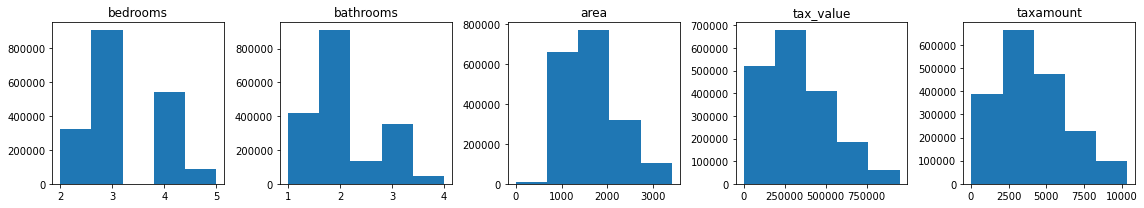

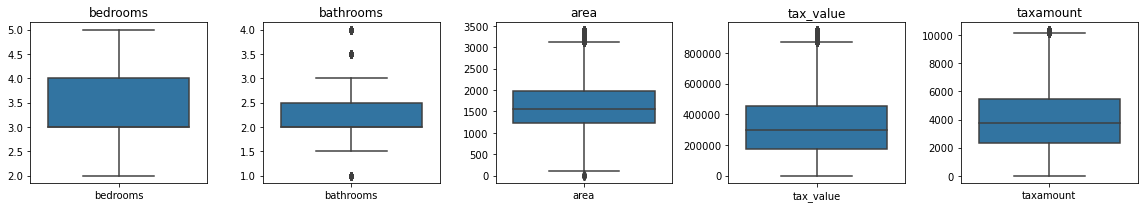

In [2]:
#all in one wrangle!

train, validate, test = wrangle.wrangle_zillow()

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [3]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount',
       'fips'],
      dtype='object')

In [4]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1038959 non-null  float64
 1   bathrooms   1038959 non-null  float64
 2   area        1038959 non-null  float64
 3   tax_value   1038959 non-null  float64
 4   year_built  1038959 non-null  float64
 5   taxamount   1038959 non-null  float64
 6   fips        1038959 non-null  object 
dtypes: float64(6), object(1)
memory usage: 63.4+ MB


In [6]:
#bedrooms, bathrooms, year_built 

In [7]:
# Standard scaler to start
scaler = sklearn.preprocessing.StandardScaler()

features = ['area', 'tax_value', 'taxamount']

In [8]:
#claim our TVT from the features above
X_train = train[features]
X_validate = train[features]
X_test = train[features]

In [9]:
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

scaler.fit(X_train)

scaled_data = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'Scaled')

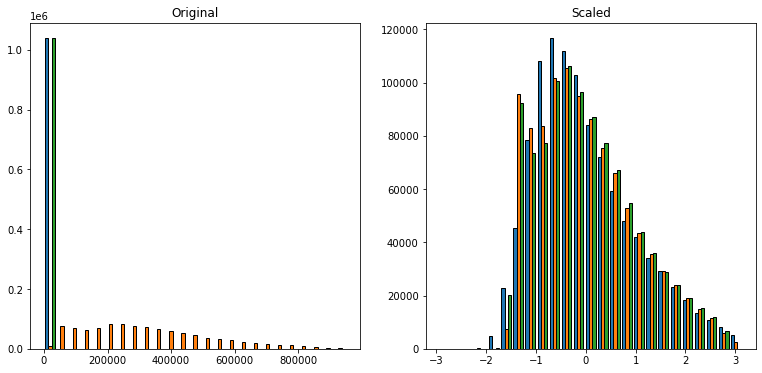

In [10]:
#PLT from class code:

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [11]:
#scaler_data.inverse_transform

#we are taking the same scaler - .fit stores those max and min values
# uses

In [12]:
inver_new_data = scaler.inverse_transform(X_train)
inver_new_data


array([[8.82443248e+05, 4.93969797e+10, 5.62021432e+06],
       [1.00037087e+06, 1.75888312e+10, 3.75339099e+06],
       [8.20940327e+05, 1.61519426e+10, 2.94373231e+06],
       ...,
       [1.20462827e+06, 3.15338737e+10, 4.57291672e+06],
       [4.41766360e+05, 9.49505862e+10, 1.46021222e+07],
       [6.40381295e+05, 5.68510506e+10, 7.99581860e+06]])

In [13]:
inver_new_data

array([[8.82443248e+05, 4.93969797e+10, 5.62021432e+06],
       [1.00037087e+06, 1.75888312e+10, 3.75339099e+06],
       [8.20940327e+05, 1.61519426e+10, 2.94373231e+06],
       ...,
       [1.20462827e+06, 3.15338737e+10, 4.57291672e+06],
       [4.41766360e+05, 9.49505862e+10, 1.46021222e+07],
       [6.40381295e+05, 5.68510506e+10, 7.99581860e+06]])

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [14]:
sklearn.preprocessing.QuantileTransformer

sklearn.preprocessing._data.QuantileTransformer

In [15]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal',random_state=0)
scaler.fit_transform(X_train)

array([[ 0.02634899, -0.24924725, -0.60136853],
       [ 0.3723028 , -1.22253521, -0.99835922],
       [-0.17782698, -1.3015559 , -1.22323144],
       ...,
       [ 0.85770075, -0.75936701, -0.82491628],
       [-2.14401067,  0.76814705,  1.01927252],
       [-0.93974701, -0.05493818, -0.07938913]])

Text(0.5, 1.0, 'Scaled')

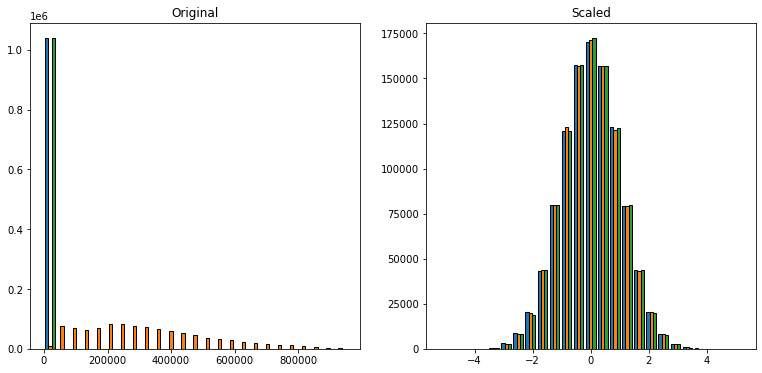

In [16]:
#defined new scaler in previous line

X_train_scaled = scaler.transform(X_train)
#PLT from class code:

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')



### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

Text(0.5, 1.0, 'Scaled')

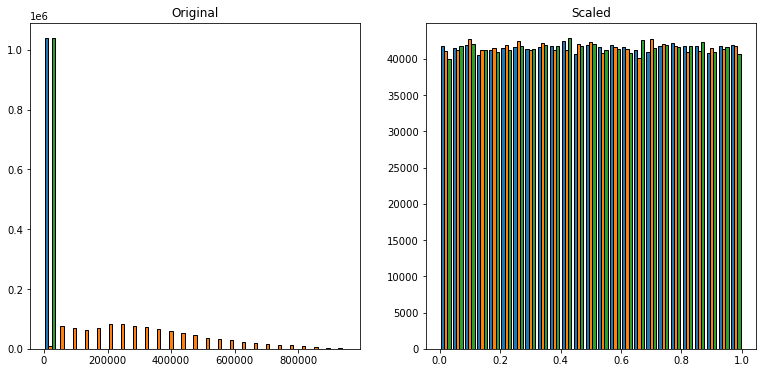

In [17]:
scaler = sklearn.preprocessing.QuantileTransformer(random_state=0)
scaler.fit_transform(X_train)

#copy code over

X_train_scaled = scaler.transform(X_train)
#PLT from class code:

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')


Output distribution creates a normal means of distribution while omitting for question for 4 shows a uniform distribution, notice the x-axis scale.

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [18]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0


In [19]:
scaler = sklearn.preprocessing.StandardScaler()
features = ['area', 'tax_value', 'taxamount']

In [22]:
#must define your features 

# def standard_scale(train, validate, test, features):
#     X_train = train[features]
#     X_validate = train[features]
#     X_test = train[features]

In [23]:
#pulled from material 
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    
    # new column names
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    # Fit the scaler on the train
    scaler.fit(train[columns_to_scale])
    
    # transform train validate and test
    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

In [24]:
# Exercise Review Code:

def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """

    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [25]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled